# Monte Carlo and Parameteric Hypothesis Testing
Here we will evaluate alternative approaches to testing hypotheses, using the Salmon Creek dissolved organic carbon (DOC) data.

In [77]:
# Import numerical tools
import numpy as np
from scipy import stats

# Import pyplot for plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

%config InlineBackend.figure_formats = {'svg',}
#%config InlineBackend.figure_formats = {'png', 'retina'}

#Import pandas for reading in and managing data
import pandas as pd

#Import seaborn (useful for plotting - makes plots pretty)
import seaborn as sns

In [2]:
fname = '/Users/lglarsen/Dropbox/GEOG 279 F2017/DOCDataSalmonCreek.csv'
dfm = pd.read_csv(fname)
dfm.head()

Sample Name Notes Odd Data    Creek  \
0  001_042414_TPZ1PO09 (01) - Processed Contour_ ...   NaN      NaN  Tannery   
1  002_042414_TPZ2PO10 (01) - Processed Contour_ ...   NaN      NaN  Tannery   
2  003_042414_TPZ3PO11 (01) - Processed Contour_ ...   NaN      NaN  Tannery   
3  004_042414_TPZ4G11 (01) - Processed Contour_ N...   NaN      NaN  Tannery   
4  005_042414_TPZ5PO12A (01) - Processed Contour_...   NaN      NaN  Tannery   

  Site Google Earth Label Geologic unit        Date Log Book Sample Date  \
0    9                NaN          KJfm  04/22/2014           04/22/2014   
1   10                NaN          KJfm  04/22/2014           04/22/2014   
2   11                NaN          KJfm  04/22/2014           04/22/2014   
3  G11                NaN          KJfm  04/22/2014           04/22/2014   
4  12A                NaN          KJfm  04/22/2014           04/22/2014   

   Long position      ...             %C10       %C11      %C12       %C13  \
0            9.0      ...        10.873896  11.558222  3.550409   9.285394   
1           10.0      ...        10.107547  12.080538  3.614137   9.052820   
2           11.0      ...        10.249528  12.516174  3.671808  11.707836   
3           11.0      ...        11.160470  10.382667  4.402502  11.346885   
4           12.1      ...        11.514461  10.883761  3.882090  11.616974   

      Prin1     Prin2     Prin3     Prin4     Prin5 Cluster number  
0  2.203891 -2.325450 -0.110899  0.990592  0.515150              1  
1  1.279114 -1.261254  0.873577  1.419246 -0.203224              1  
2  1.083401 -1.619431  1.045107  1.462070  0.374057              1  
3  0.482100 -0.972007  1.215456  2.481882 -0.235102              1  
4 -2.313075 -0.460215  0.407160  1.616753 -1.020926              2  

[5 rows x 67 columns]

Let's now retrieve the column for the DOC (dissolved organic carbon) content of the samples and separate the values that pertain to Tannery Creek from those that pertain to Fay Creek.

In [11]:
DOC = dfm['Recalc TOC with std curve']
Creek = dfm['Creek']

# Below, the double "=" sign refers to a logical test. It differentiates the return of a binary variable (i.e., 
# "Give me a 'yes' for every entry of the variable Creek that is equal to the right-hand-side) from the assignment
# of a variable (i.e., set each entry in the variable Creek equal to 'Tannery').
DOC_T = DOC[Creek=='Tannery'] # Make a separate variable for DOC in Tannery Creek
DOC_F = DOC[Creek=='Fay'] # Make a separate variable for DOC in Fay Creek

# Let's query the size of these arrays in two different ways:
print(np.shape(DOC_T))
print(len(DOC_F))

(196,)
176


To start, let's do a traditional t-test to figure out whether the mean values of DOC in Fay Creek and Tannery Creek are equivalent. Even before doing this, though, let's see what the mean and standard deviation are.

In [17]:
print(np.nanmean(DOC_T))
print(np.nanmean(DOC_F))
print(np.nanstd(DOC_T))
print(np.nanstd(DOC_F))

5.59293785311
10.0296052632
7.34527792212
11.7429189683


*Interpretation*: Because the standard deviation of the Fay Creek sample is > 150% that of Tannery Creek, we definitely want to use the Welch-Satterwaithe modification to the t-test.

In [19]:
help(stats.ttest_ind) # Note below the options for dealing with NaNs. Note also how to implement Welch's version of 
# the t-test.

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculates the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
  

In [21]:
stats.ttest_ind(DOC_T, DOC_F, axis=0, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-4.0171465513366824, pvalue=7.8341162625218658e-05)

So, as we might have expected from looking at the mean values, they are significantly different, with a very small p-value (i.e., a very, very small probability that a difference in mean that extreme or more extreme could have arisen from random chance if the DOC values in each stream were indeed normally distributed.

Remembering this, we should probably go ahead and check how these samples really are distributed.

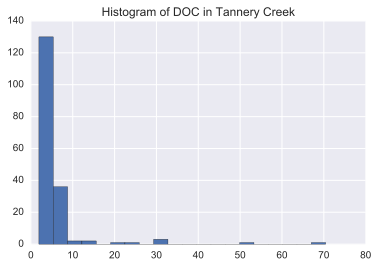

In [30]:
plt.hist(DOC_T[~np.isnan(DOC_T)], 20)
plt.title('Histogram of DOC in Tannery Creek')
plt.show()

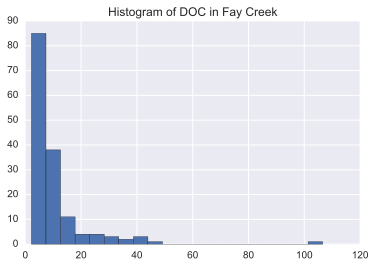

In [31]:
plt.hist(DOC_F[~np.isnan(DOC_F)], 20)
plt.title('Histogram of DOC in Fay Creek')
plt.show()

Yikes, these are very far from normal! Let's see what happens if we transform them.

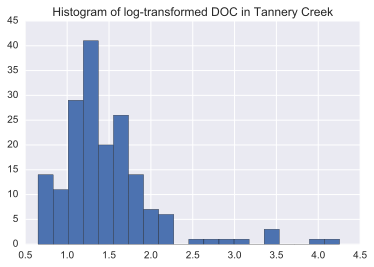

In [33]:
plt.hist(np.log(DOC_T[~np.isnan(DOC_T)]), 20)
plt.title('Histogram of log-transformed DOC in Tannery Creek')
plt.show()

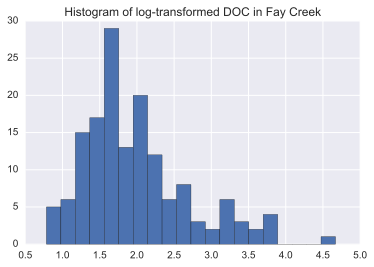

In [34]:
plt.hist(np.log(DOC_F[~np.isnan(DOC_F)]), 20)
plt.title('Histogram of log-transformed DOC in Fay Creek')
plt.show()

This is considerably better, probably enough to use a t-test. Let's recheck the mean and variance of the tranformed variables.

In [36]:
DOC_Tt = np.log(DOC_T) # Give the log-transformed variable its own name.
DOC_Ft = np.log(DOC_F)
print(np.nanmean(DOC_T))
print(np.nanmean(DOC_F))
print(np.nanstd(DOC_T))
print(np.nanstd(DOC_F))

5.59293785311
10.0296052632
7.34527792212
11.7429189683


Now the variances are probably close enough that we can use the standard t-test. But let's do it both ways anway and compare the outcome.

In [37]:
stats.ttest_ind(DOC_Tt, DOC_Ft, axis=0, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-7.1956976627163201, pvalue=5.4990675243126792e-12)

In [38]:
stats.ttest_ind(DOC_T, DOC_F, axis=0, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=-4.1535623537175184, pvalue=4.1823134550293835e-05)

Both versions lead us to reject the null hypothesis, but the p-value is actually much more similar to what we originally computed for the equal-variance version. In reality, it is most "honest" to decide a priori, based on what you know about your data and based on the questions you are asking, the statistical test that is most robust. In this case, we go with the equal-variance test on the transformed data.

# Monte Carlo Test of Difference in Means

Another way to deal with the fact that your underlying data distributions are highly non-normal would be to do a Monte Carlo analysis. Here, our null hypothesis is that all of our DOC data came from the same population, and that we observed these differences in mean just through random chance.

To test whether this is a plausible hypothesis, we combine all of the DOC data into one big pool (this is our "population," which implicitly assumes that the data we have collected is representative of that putative population). Then we randomly draw from this population (without replacement) the number of samples that we originally had for Fay Creek, and the number of samples that we originally had for Tannery Creek. We compute the test statistic, which is the absolute value of the difference between sample means. Then we repeat this procedure a large number of times and see where the actual observed difference falls in this distribution. 

To get a p-value, we need to calculate the percentage of samples from our random trials that resulted in a test statistic greater than or equal to our observed absolute difference between the means (this would be equivalent to the two-tailed p-value if we did not take the absolute value of the difference). 

The beauty of this strategy is that the distribution of the test statistic under the null hypothesis is generated from the properties of the data alone.

First, let's look at a key function that we will need:

In [42]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    Parameters
    -----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a was np.arange(n)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry in a.
        If not given the sample assumes a uniform distribution over all
        entries in a.
    
    Returns
    --------
    samples : 1-D ndarray, s

You might be tempted to apply this function to the combined DOC array directly, but the problem with doing this is that there is no way to retrieve the numbers left behind (i.e., the ones not sampled in the algorithm), which we need in order to compute a difference of means. So what we need to do is:

1.) Create a list of integers representing the index values of the combined DOC array.

2.) Randomly sample from those integers without replacement the same number of samples we had taken for Fay Creek.

3.) Figure out the integers (i.e., index values) that were left behind and assigne these to Tannery Creek. We can do this using the `np.setdiff1d` command, which identifies all of the values in array 1 that are not in array 2.

4.) Take the mean of those DOC samples 'belonging' to Fay Creek in this randomized trial and difference it fromthe mean of those DOC samples 'belonging' to Tannery Creek.

Now, let's generate the distribution of test statistics, assuming the null hypothesis is true...

4.43666741005


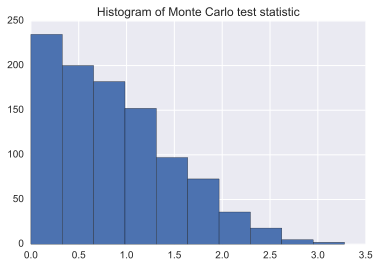

In [65]:
DOC_TF = np.append(DOC_T, DOC_F) # This sticks the two arrays together.
DOC_TF = DOC_TF[~np.isnan(DOC_TF)] # Take out the NaNs and overwrite the variable with the non-NaN version.
n_T = len(DOC_T[~np.isnan(DOC_T)]) # Number of samples that are not NaN for Tannery Creek
n_F = len(DOC_F[~np.isnan(DOC_F)]) # Number of samples that are not NaN for Fay Creek
ntrials = 1000 # This should generally be the minimum number of trials you would use for a Monte Carlo analysis.
actual_diff = np.abs(np.nanmean(DOC_T)-np.nanmean(DOC_F)) #The actual absolute difference between the two samples.
print(actual_diff)

dist = np.zeros(ntrials) # Initialize the array that will become the distribution of test statistics.

for trial in range(ntrials): # This will generate numbers from 0 to ntrials-1 (which is perfect for indexing the 
    # actual_diff array!)
    inds_F = np.random.choice(len(DOC_TF), n_F, replace=False) # The indices assigned to Fay Creek. The first argument
    # implicitly assumes that the array we are feeding it = range(len(DOC_TF))--see the example from the help writeup
    # for this function. In other words, we are choosing n_F values from a list of integers of value 0,1,2,...length 
    # of the combined DOC array - 1.
    
    inds_T = np.setdiff1d(range(len(DOC_TF)), inds_F) # Now find the indices assigned to Tannery Creek using the 
    # set difference function.
    
    dist[trial] = np.abs(np.mean(DOC_TF[inds_F])-np.mean(DOC_TF[inds_T])) # Take the absolute value of the mean difference
    # between the two selected groups.
    
# Now let's plot the distribution of our test statistic
plt.hist(dist)
plt.title('Histogram of Monte Carlo test statistic')
plt.show()

Notice that the actual absolute difference between the two creeks isn't even on this chart! This means that the p-value is less than 1/n_trials, which we would report here as *p* < 0.001. Try increasing the number of trials if you want to figure out if it is even lower than this. (In fact, how many trials would you need to undertake to figure out if the p-value was comparable to, or lower than, the parametric t-test?)

Let's try that...

4.43666741005


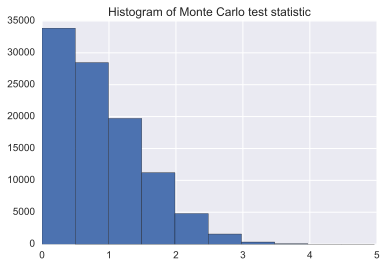

In [66]:
DOC_TF = np.append(DOC_T, DOC_F) # This sticks the two arrays together.
DOC_TF = DOC_TF[~np.isnan(DOC_TF)] # Take out the NaNs and overwrite the variable with the non-NaN version.
n_T = len(DOC_T[~np.isnan(DOC_T)]) # Number of samples that are not NaN for Tannery Creek
n_F = len(DOC_F[~np.isnan(DOC_F)]) # Number of samples that are not NaN for Fay Creek
ntrials = 100000 # This should generally be the minimum number of trials you would use for a Monte Carlo analysis.
actual_diff = np.abs(np.nanmean(DOC_T)-np.nanmean(DOC_F)) #The actual absolute difference between the two samples.
print(actual_diff)

dist = np.zeros(ntrials) # Initialize the array that will become the distribution of test statistics.

for trial in range(ntrials): # This will generate numbers from 0 to ntrials-1 (which is perfect for indexing the 
    # actual_diff array!)
    inds_F = np.random.choice(len(DOC_TF), n_F, replace=False) # The indices assigned to Fay Creek. The first argument
    # implicitly assumes that the array we are feeding it = range(len(DOC_TF))--see the example from the help writeup
    # for this function. In other words, we are choosing n_F values from a list of integers of value 0,1,2,...length 
    # of the combined DOC array - 1.
    
    inds_T = np.setdiff1d(range(len(DOC_TF)), inds_F) # Now find the indices assigned to Tannery Creek using the 
    # set difference function.
    
    dist[trial] = np.abs(np.mean(DOC_TF[inds_F])-np.mean(DOC_TF[inds_T])) # Take the absolute value of the mean difference
    # between the two selected groups.
    
# Now let's plot the distribution of our test statistic
plt.hist(dist)
plt.title('Histogram of Monte Carlo test statistic')
plt.show()

In [67]:
print(np.max(dist))

4.96433429973


So now, by random chance, we did observe at least one value larger than our experimental absolute difference. Let's calculate a p-value by finding the percentage of samples greater than or equal to our experimental test statistic. We can do this through logical indexing (i.e., applying a logical test to each element in an array).

In [72]:
tails = np.sum(dist>=actual_diff) # This first creates a new variable of 0s and 1s, where every 1 represents
# an element of dist that has a value greater than or equal to actual_diff. We then add up the total number of 1s, or
# the total number of elements in the array that satisfy this criterion.

p = tails/len(dist) # The probability of randomly getting an absolute difference greater than or equal to what we observed.
print(p)

1e-05


Just out of curiosity, let's go up one order of magnitude in n_trials...

4.43666741005


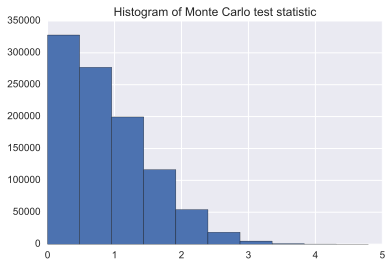

In [75]:
DOC_TF = np.append(DOC_T, DOC_F) # This sticks the two arrays together.
DOC_TF = DOC_TF[~np.isnan(DOC_TF)] # Take out the NaNs and overwrite the variable with the non-NaN version.
n_T = len(DOC_T[~np.isnan(DOC_T)]) # Number of samples that are not NaN for Tannery Creek
n_F = len(DOC_F[~np.isnan(DOC_F)]) # Number of samples that are not NaN for Fay Creek
ntrials = 1000000 # This should generally be the minimum number of trials you would use for a Monte Carlo analysis.
actual_diff = np.abs(np.nanmean(DOC_T)-np.nanmean(DOC_F)) #The actual absolute difference between the two samples.
print(actual_diff)

dist = np.zeros(ntrials) # Initialize the array that will become the distribution of test statistics.

for trial in range(ntrials): # This will generate numbers from 0 to ntrials-1 (which is perfect for indexing the 
    # actual_diff array!)
    inds_F = np.random.choice(len(DOC_TF), n_F, replace=False) # The indices assigned to Fay Creek. The first argument
    # implicitly assumes that the array we are feeding it = range(len(DOC_TF))--see the example from the help writeup
    # for this function. In other words, we are choosing n_F values from a list of integers of value 0,1,2,...length 
    # of the combined DOC array - 1.
    
    inds_T = np.setdiff1d(range(len(DOC_TF)), inds_F) # Now find the indices assigned to Tannery Creek using the 
    # set difference function.
    
    dist[trial] = np.abs(np.mean(DOC_TF[inds_F])-np.mean(DOC_TF[inds_T])) # Take the absolute value of the mean difference
    # between the two selected groups.
    
# Now let's plot the distribution of our test statistic
plt.hist(dist)
plt.title('Histogram of Monte Carlo test statistic')
plt.show()

In [76]:
tails = np.sum(dist>=actual_diff) # This first creates a new variable of 0s and 1s, where every 1 represents
# an element of dist that has a value greater than or equal to actual_diff. We then add up the total number of 1s, or
# the total number of elements in the array that satisfy this criterion.

p = tails/len(dist) # The probability of randomly getting an absolute difference greater than or equal to what we observed.
print(p)

6e-06
